Import použitých knižníc

In [1]:
import pandas as pd
import glob, os



In [2]:
import mplfinance as fplt
import ipywidgets as widgets

In [3]:
files = glob.glob('InputData/*.csv')
df = pd.concat([pd.read_csv(fp, parse_dates=True).assign(Title=os.path.basename(fp).split('.')[0]) 
       for fp in files])

df['Date'] = pd.to_datetime(df['Date'])

# set the index
df.set_index('Date', inplace=True)

print (df.head())

                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2018-04-18  47.910000  48.310001  47.840000  48.139999  43.171364  80289500   
2018-04-19  48.259998  48.290001  47.700001  47.860001  42.920261  67581100   
2018-04-20  47.590000  47.619999  47.049999  47.259998  42.382191  80997700   
2018-04-23  47.169998  47.299999  46.779999  46.880001  42.041412  74337500   
2018-04-24  47.259998  47.360001  46.430000  46.660000  41.844120  72196800   

           Title  
Date              
2018-04-18   EEM  
2018-04-19   EEM  
2018-04-20   EEM  
2018-04-23   EEM  
2018-04-24   EEM  


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6290 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6290 non-null   datetime64[ns]
 1   Open       6290 non-null   float64       
 2   High       6290 non-null   float64       
 3   Low        6290 non-null   float64       
 4   Close      6290 non-null   float64       
 5   Adj Close  6290 non-null   float64       
 6   Volume     6290 non-null   int64         
 7   Title      6290 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 442.3+ KB


c:\Projekty\PredictNow\OnboardProjectGit\.venv\lib\site-packages\mplfinance\_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


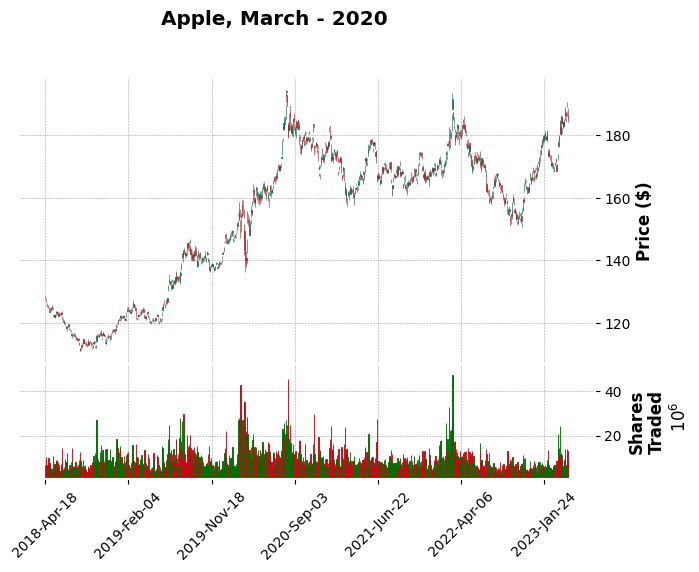

In [6]:
fplt.plot(  df[df['Title'] == 'GLD'],
            type='candle',
            style='charles',
            title='Apple, March - 2020',
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Shares\nTraded',
            )

In [5]:
DistinctTitles=df['Title'].unique()

widgets.ToggleButtons(
    options=DistinctTitles,
    description='Speed:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast']
#     icons=['check'] * 3
)

ToggleButtons(description='Speed:', options=('EEM', 'GLD', 'SPY', 'TLT', 'VGK'), tooltips=('Description of slo…

In [8]:
def DistinctTitlePlot(DistinctTitles):
    fplt.plot(  df[df['Title'] == DistinctTitles],
            type='candle',
            style='charles',
            title='Apple, March - 2020',
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Shares\nTraded',
            )
     
widgets.interact(DistinctTitlePlot, DistinctTitles=df['Title'].unique());

interactive(children=(Dropdown(description='DistinctTitles', options=('EEM', 'GLD', 'SPY', 'TLT', 'VGK'), valu…

In [35]:
import ipywidgets as widgets
from IPython.display import display

DistinctTitles=df['Title'].unique()

SelectTitle=widgets.ToggleButtons(
    options=DistinctTitles,
    description='Title:',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltips=['Description of slow', 'Description of regular', 'Description of fast']
#     icons=['check'] * 3
)

def DistinctTitlePlot(SelectTitle):
    fplt.plot(  df[df['Title'] == SelectTitle],
            type='candle',
            style='charles',
            title=SelectTitle,
            ylabel='Price ($)',
            volume=True,
            ylabel_lower='Shares\nTraded',
            warn_too_much_data=99999999
            )

   
out1 = widgets.interactive_output(DistinctTitlePlot, {'SelectTitle': SelectTitle})

display(SelectTitle)
display(out1)

ToggleButtons(description='Title:', options=('EEM', 'GLD', 'SPY', 'TLT', 'VGK'), tooltips=('Description of slo…

Output()

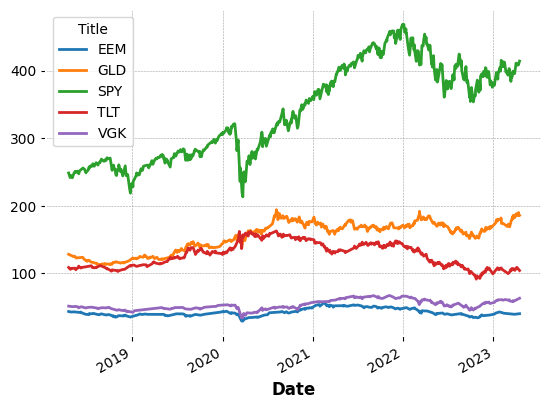

In [30]:
#import matplotlib
import matplotlib.pyplot as plt

df.pivot(columns="Title", values="Adj Close").plot()

plt.show()

In [29]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Title
Date,,,,,,,
2018-04-18,47.910000,48.310001,47.840000,48.139999,43.171364,80289500,EEM
2018-04-19,48.259998,48.290001,47.700001,47.860001,42.920261,67581100,EEM
2018-04-20,47.590000,47.619999,47.049999,47.259998,42.382191,80997700,EEM
2018-04-23,47.169998,47.299999,46.779999,46.880001,42.041412,74337500,EEM
2018-04-24,47.259998,47.360001,46.430000,46.660000,41.844120,72196800,EEM
